In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

In [2]:
train = pd.read_csv('drive/MyDrive/GEE/train_data.csv')
train.head()

,B2,B3,B4,B8,class_3,class_2,.geo,Contributor,coordinates
0,1122.0,1440.0,1754.0,1960.0,2,1,"{'geodesic': False, 'type': 'Point', 'coordina...",NK,"[146.5644056016995, -38.182756404207645]"
1,450.0,766.0,1002.0,2248.0,2,1,"{'geodesic': False, 'type': 'Point', 'coordina...",EG,"[144.29930361279213, -36.75695038525314]"
2,1323.0,1322.0,1153.0,1464.0,0,0,"{'geodesic': False, 'type': 'Point', 'coordina...",AK,"[152.34102203623007, -27.554339120147525]"
3,991.0,1278.0,1672.0,2608.0,1,1,"{'geodesic': False, 'type': 'Point', 'coordina...",AK,"[143.7278852605637, -37.910746536176255]"
4,1182.0,1596.0,2192.0,3113.0,1,1,"{'geodesic': False, 'type': 'Point', 'coordina...",AK,"[143.8925464521428, -37.95476398509811]"


In [3]:
test = pd.read_csv('drive/MyDrive/GEE/test_data.csv')
test.head()

,B2,B3,B4,B8,class_3,class_2,.geo,Contributor,coordinates
0,283.0,780.0,727.0,3580.0,2,1,"{'geodesic': False, 'type': 'Point', 'coordina...",MB,"[144.25887942500674, -36.7634182552988]"
1,1180.0,1474.0,1838.0,2488.0,0,0,"{'geodesic': False, 'type': 'Point', 'coordina...",AK,"[143.59385662017306, -37.98755249296847]"
2,1014.5,1283.0,1621.0,2593.0,1,1,"{'geodesic': False, 'type': 'Point', 'coordina...",AK,"[143.85553586243708, -37.94164858194996]"
3,504.5,782.5,1049.0,2591.0,2,1,"{'geodesic': False, 'type': 'Point', 'coordina...",RJ,"[141.59806955344473, -38.130294791615064]"
4,475.0,739.0,771.5,2585.5,2,1,"{'geodesic': False, 'type': 'Point', 'coordina...",AK,"[148.49533430491442, -37.748600627392676]"


In [4]:
# Feature selection
train_bin = train[['B2', 'B3', 'B4', 'B8', 'class_2']]
test_bin = test[['B2', 'B3', 'B4', 'B8', 'class_2']]
train_multi = train[['B2', 'B3', 'B4', 'B8', 'class_3']]
test_multi = test[['B2', 'B3', 'B4', 'B8', 'class_3']]

Binary random forest classifier results: 

              precision    recall  f1-score   support

       Water       0.90      0.42      0.57       364
   Veg/Urban       0.77      0.98      0.86       728

    accuracy                           0.79      1092
   macro avg       0.83      0.70      0.72      1092
weighted avg       0.81      0.79      0.76      1092

Binary classifier accuracy is 79.03%. 

Confusion matrix:


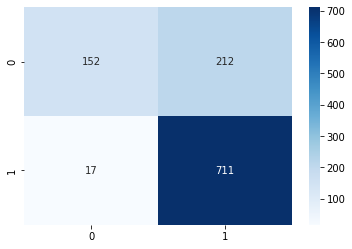

In [5]:
# Define feature and label columns
x_train_bin = train_bin.iloc[:,:-1]
y_train_bin = train_bin.iloc[:,-1]
x_test_bin = test_bin.iloc[:,:-1]
y_test_bin = test_bin.iloc[:,-1]

# Define instance of RF classifier
clf = RandomForestClassifier(max_depth=5, random_state=42)
# Fit training data
model = clf.fit(x_train_bin,y_train_bin)
# Predict using test data
pred = model.predict(x_test_bin)

# Results
print('Binary random forest classifier results: \n')
print(classification_report(y_test_bin, pred, target_names=['Water', 'Veg/Urban']))
print('Binary classifier accuracy is {:.2f}%. \n\nConfusion matrix:'.format(accuracy_score(y_test_bin, pred)*100))
cm = confusion_matrix(y_test_bin, pred)
sns.heatmap(cm, annot=True, fmt='.0f', cmap='Blues')

Multi-class random forest classifier results: 

              precision    recall  f1-score   support

       Water       0.70      0.62      0.66       364
         Veg       0.62      0.78      0.69       364
       Urban       0.78      0.68      0.73       364

    accuracy                           0.69      1092
   macro avg       0.70      0.69      0.69      1092
weighted avg       0.70      0.69      0.69      1092

Multi-class classifier accuracy is 69.14%. 

Confusion matrix:


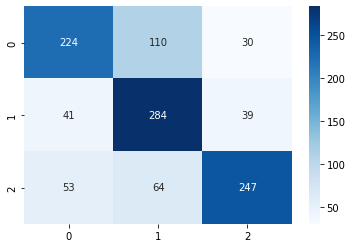

In [6]:
# Define feature and label columns
x_train_multi = train_multi.iloc[:,:-1]
y_train_multi = train_multi.iloc[:,-1]
x_test_multi = test_multi.iloc[:,:-1]
y_test_multi = test_multi.iloc[:,-1]

# Define instance of RF classifier
clf = RandomForestClassifier(max_depth=5, random_state=42)
# Fit training data
model = clf.fit(x_train_multi,y_train_multi)
# Predict using test data
pred = model.predict(x_test_multi)

# Results
print('Multi-class random forest classifier results: \n')
print(classification_report(y_test_multi, pred, target_names=['Water', 'Veg', 'Urban']))
print('Multi-class classifier accuracy is {:.2f}%. \n\nConfusion matrix:'.format(accuracy_score(y_test_multi, pred)*100))
cm = confusion_matrix(y_test_multi, pred)
sns.heatmap(cm, annot=True, fmt='.0f', cmap='Blues')

Hyperparameter Tuning - Binary 

In [13]:
# https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [14]:
rf_bin = RandomizedSearchCV(estimator = RandomForestClassifier(), param_distributions=random_grid, n_iter=10, random_state=42)
rf_bin.fit(x_train_bin, y_train_bin)
rf_bin.best_params_

{'bootstrap': True,
 'max_depth': 100,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 90}

Optimised binary random forest classifier results: 

              precision    recall  f1-score   support

       Water       0.89      0.88      0.89       364
   Veg/Urban       0.94      0.95      0.94       728

    accuracy                           0.92      1092
   macro avg       0.92      0.91      0.91      1092
weighted avg       0.92      0.92      0.92      1092

Optimised binary classifier accuracy is 92.40%. 

Confusion matrix:


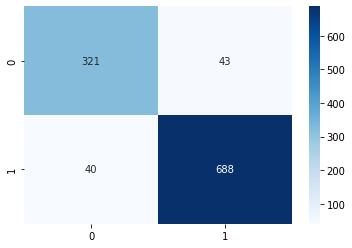

In [21]:
# Results
# Define instance of RF classifier
clf = RandomForestClassifier(bootstrap=True, max_depth=100, max_features='auto', min_samples_leaf=1, min_samples_split=5, n_estimators=90)
# Fit training data
model = clf.fit(x_train_bin,y_train_bin)
# Predict using test data
pred = model.predict(x_test_bin)

print('Optimised binary random forest classifier results: \n')
print(classification_report(y_test_bin, pred, target_names=['Water', 'Veg/Urban']))
print('Optimised binary classifier accuracy is {:.2f}%. \n\nConfusion matrix:'.format(accuracy_score(y_test_bin, pred)*100))
cm = confusion_matrix(y_test_bin, pred)
sns.heatmap(cm, annot=True, fmt='.0f', cmap='Blues')

Hyperparamter Tuning -  Multiclass 

In [22]:
rf_multi = RandomizedSearchCV(estimator = RandomForestClassifier(), param_distributions=random_grid, n_iter=10, random_state=42)
rf_multi.fit(x_train_multi, y_train_multi)
rf_multi.best_params_

{'bootstrap': True,
 'max_depth': 70,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 60}

Optimised multi-class random forest classifier results: 

              precision    recall  f1-score   support

       Water       0.86      0.89      0.87       364
         Veg       0.81      0.80      0.81       364
       Urban       0.85      0.82      0.84       364

    accuracy                           0.84      1092
   macro avg       0.84      0.84      0.84      1092
weighted avg       0.84      0.84      0.84      1092

Optimised multi-class classifier accuracy is 84.07%. 

Confusion matrix:


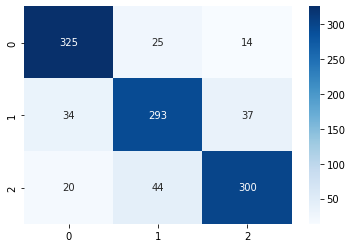

In [23]:
# Results
# Define instance of RF classifier
clf = RandomForestClassifier(bootstrap=True, max_depth=70, max_features='auto', min_samples_leaf=1, min_samples_split=5, n_estimators=60)
# Fit training data
model = clf.fit(x_train_multi,y_train_multi)
# Predict using test data
pred = model.predict(x_test_multi)

print('Optimised multi-class random forest classifier results: \n')
print(classification_report(y_test_multi, pred, target_names=['Water', 'Veg', 'Urban']))
print('Optimised multi-class classifier accuracy is {:.2f}%. \n\nConfusion matrix:'.format(accuracy_score(y_test_multi, pred)*100))
cm = confusion_matrix(y_test_multi, pred)
sns.heatmap(cm, annot=True, fmt='.0f', cmap='Blues')